In [31]:
!rm -r Neural_Networks-101-challenge/
!git clone https://github.com/KiranArun/Neural_Networks-101-challenge.git
!mkdir /content/logdir/
get_ipython().system_raw('tensorboard --logdir=/content/logdir/ --host=0.0.0.0 --port=6006 &')
!python3 /content/Neural_Networks-101-challenge/scripts/setup.py
get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print('Tensorboard Link:', json.load(sys.stdin)['tunnels'][0]['public_url'])"

Cloning into 'Neural_Networks-101-challenge'...
remote: Counting objects: 18, done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 3), reused 15 (delta 3), pack-reused 0
Unpacking objects: 100% (18/18), done.
mkdir: cannot create directory ‘/content/logdir/’: File exists
Tensorboard Link: http://68de0325.ngrok.io


# Neural Networks Challenge

You will create and train a neural net to classify pictures of dogs and cats.

You can only change the hyperparameters and network, I suggest researching image recognition.

In [0]:
# importing libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.preprocessing.image import ImageDataGenerator
import keras.layers as layers
import keras.activations as activations

### Tuning Hyperparameters

In [0]:
# hyperparams

# input image dimensions
image_dims = (150,150)

# number of images to input each step
batch_size = 100

# number of times to go through the whole dataset
epochs = 1

# learning rate
learning_rate = 0.01

In [0]:
# DO NOT EDIT

# set tensorboard to log each epoch and model graph
model_logdir = '/content/logdir/'

hparam_str = ',lr_%f' % (learning_rate)
previous_runs = list(f for f in os.listdir(model_logdir) if f.startswith('run'))

if len(previous_runs) == 0:
    run_number = 1  
else:
    run_number = max([int(s[4:6]) for s in previous_runs]) + 1

LOGDIR = '%srun_%02d' % (model_logdir, run_number)+hparam_str+'/'

tensorboard = keras.callbacks.TensorBoard(log_dir=LOGDIR)

In [0]:
# DO NOT EDIT

# save model after each epoch
# this is so you can choose which weights you want
checkpoint = keras.callbacks.ModelCheckpoint(filepath=LOGDIR+'model.{epoch:02d}-{val_acc:.2f}.hdf5',
                                             monitor='val_acc',
                                             verbose=1)

In [37]:
# DO NOT EDIT

# create data generator (it will create the data from the images on the fly)
data_dir = '/content/Neural_Networks-101-challenge/data/'

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        data_dir+'train/',
        target_size=image_dims,
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        data_dir+'validation/',
        target_size=image_dims,
        batch_size=batch_size,
        class_mode='binary')

FileNotFoundError: ignored

### Creating the Neural Net

In [0]:
# DO NOT EDIT

# reset session, create new graph
keras.backend.clear_session()

# initialize model
model = keras.models.Sequential()

The following resources will show you how to implement things, not what to implement.

see [keras core layers](https://keras.io/layers/core/)

see [keras convolutional 2d layer](https://keras.io/layers/convolutional/#conv2d)

see [keras max pooling 2d layer](https://keras.io/layers/pooling/#maxpooling2d)

see [keras activation functions](https://keras.io/activations/)

In [0]:
# add layer(s)

model.add(layers.Conv2D(filters=32,
                        kernel_size=5,
                        strides=5,
                        padding="same",
                        activation='relu',
                        input_shape=image_dims+(3,)))

model.add(layers.MaxPool2D(pool_size=3,
                           strides=3,
                           padding="same"))

model.add(layers.Flatten())

# the last layer needs to output 1 unit, and have sigmoid activation
model.add(layers.Dense(units=1,
                       activation='sigmoid'))

In [24]:
# DO NOT EDIT

# show model summmary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3201      
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [0]:
# optimizer
optimizer = keras.optimizers.SGD(lr=learning_rate)

In [0]:
# DO NOT EDIT

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [27]:
# DO NOT EDIT

history = model.fit_generator(generator=train_generator,
                              epochs=epochs,
                              verbose=1,
                              validation_data=validation_generator,
                              callbacks=[tensorboard,checkpoint])

Epoch 1/1
206/206 [==============================] - 66s 320ms/step - loss: 0.6861 - acc: 0.5508 - val_loss: 0.6838 - val_acc: 0.5279

Epoch 00001: saving model to /content/logdir/run_02,lr_0.010000/model.01-0.53.hdf5


In [28]:
# DO NOT EDIT

score = model.evaluate_generator(generator=validation_generator)
print('Validation accuracy:', str(round(100*score[1],2))+'%')

Validation accuracy: 52.79%


### Results

Below will be a list of models (from after each epoch).

You can copy the file path to the cell below to download to your local machine, then put that bacck into the drive folder

In [29]:
# DO NOT EDIT

# show path to model files with performance

checkpoints = [f for f in os.listdir(LOGDIR) if f.startswith('model')]

for model_file in checkpoints:
  print("'"+LOGDIR+model_file+"'",'with',str(model_file[-7:-5])+'% accuracy')


'/content/logdir/run_02,lr_0.010000/model.01-0.53.hdf5' with 53% accuracy


In [30]:
# pass the file path (as a string) into this function
from google.colab import files
files.download(filename=)

SyntaxError: ignored

### Example predictions

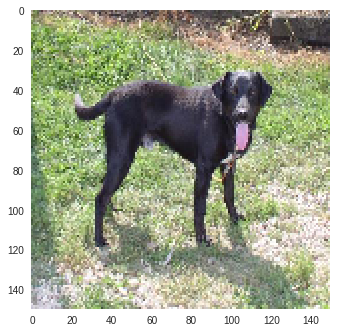

dog: 81.8%


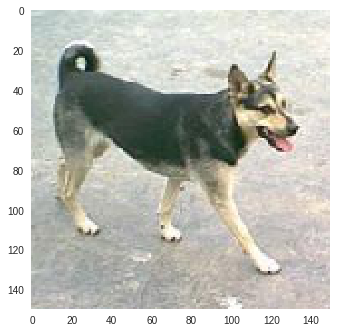

dog: 75.86%


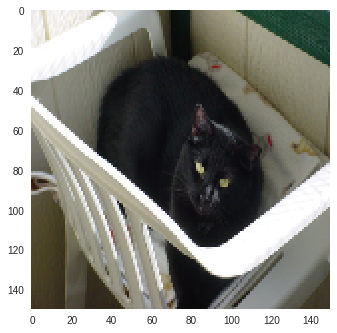

dog: 81.22%


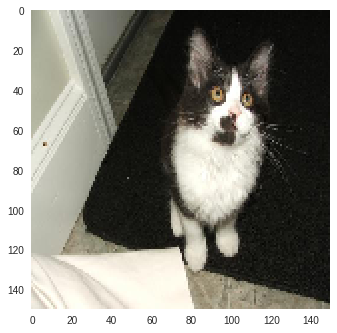

dog: 55.5%


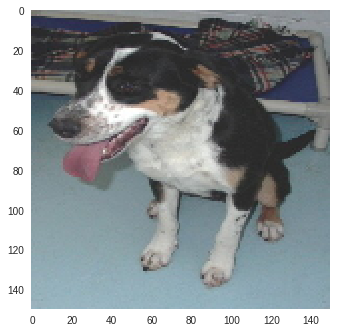

dog: 66.25%


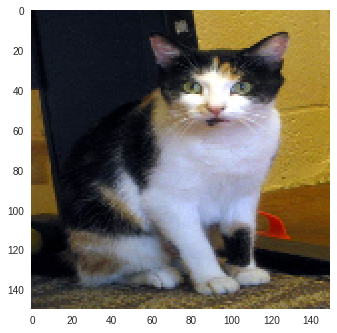

dog: 61.32%


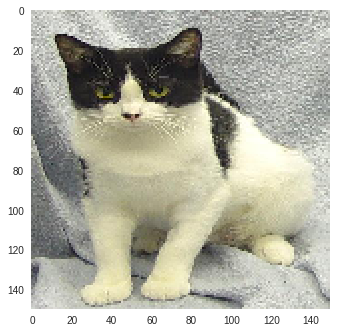

dog: 71.49%


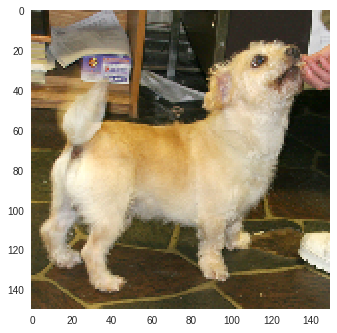

dog: 74.7%


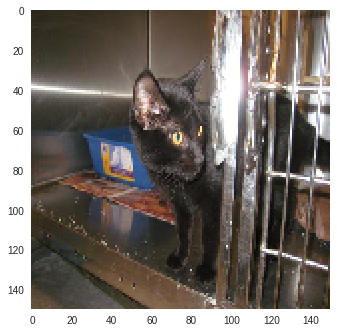

dog: 68.44%


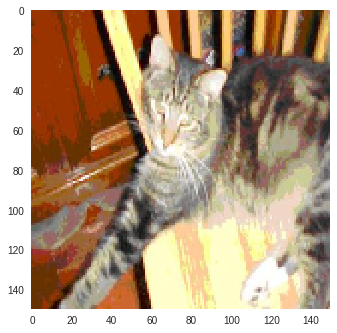

dog: 71.08%


In [16]:
samples = validation_generator.next()
ims,labs = samples[0][:10],samples[1][:10]

for i,im in enumerate(ims):
    plt.imshow(im)
    plt.grid(False)
    plt.show()
    prob = model.predict(np.expand_dims(im,axis=0))
    if prob > 0.5:
        print('dog: '+str(round(float(100*prob),2))+'%')
    else:
        print('cat: '+str(round(float(100*(1-prob)),2))+'%')